### Example notebook for WorkStation - Differential Gene Expression

This notebook demonstrates reading from API and performing analysis of differential gene expression.
- title: "Differential Gene Expression (DGE)"
- author: "Margaret Paiva"
- author: "Jon Katz"
- date: "19/10/2021"
- output: R notebook

In [17]:
# # Check your R version if packages are not compatible
# R.version

In [4]:
# # Install BiocManager
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

In [3]:
# # Install packages using BiocManager
# for (pkg in c("limma", "fgsea", "DESeq2")) {
#     if (!requireNamespace(pkg, quietly = TRUE)) {
#         BiocManager::install(pkg, update = FALSE, ask = FALSE)
#     }
# }

In [10]:
# install.packages("DBI")

package 'DBI' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mpaiva\AppData\Local\Temp\RtmpewKNz7\downloaded_packages


In [34]:
install.packages('DT')

also installing the dependency 'jquerylib'




  There is a binary version available but the source version is later:
   binary source needs_compilation
DT   0.18   0.19             FALSE

package 'jquerylib' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mpaiva\AppData\Local\Temp\Rtmpqark36\downloaded_packages


installing the source package 'DT'



In [35]:
library('DT')

In [15]:
BiocManager::install('DESeq2', update = FALSE, ask = FALSE, force = TRUE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.10 (BiocManager 1.30.16), R 3.6.1 (2019-07-05)
Installing package(s) 'DESeq2'


package 'DESeq2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mpaiva\AppData\Local\Temp\RtmpewKNz7\downloaded_packages


In [6]:
BiocManager::install("airway")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.10 (BiocManager 1.30.16), R 3.6.1 (2019-07-05)
Installing package(s) 'airway'
installing the source package 'airway'

Old packages: 'askpass', 'backports', 'BH', 'boot', 'broom', 'cachem', 'callr',
  'caret', 'class', 'cli', 'clipr', 'cluster', 'codetools', 'colorspace',
  'crayon', 'curl', 'data.table', 'dbplyr', 'digest', 'dplyr', 'evaluate',
  'fansi', 'fastmatch', 'forcats', 'foreach', 'formatR', 'fs', 'generics',
  'glmnet', 'gower', 'haven', 'hexbin', 'highr', 'Hmisc', 'hms', 'htmltools',
  'httpuv', 'httr', 'ipred', 'IRdisplay', 'IRkernel', 'isoband', 'iterators',
  'jpeg', 'jsonlite', 'KernSmooth', 'knitr', 'labeling', 'later', 'lattice',
  'lava', 'lubridate', 'magrittr', 'maps', 'markdown', 'MASS', 'Matrix',
  'matrixStats', 'mgcv', 'mime', 'ModelMetrics', 'modelr', 'nlme', 'nnet',
  'numDeriv

In [16]:
suppressPackageStartupMessages(library(jsonlite))
suppressPackageStartupMessages(library(rjson))
suppressPackageStartupMessages(library(httr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(parallel))
suppressPackageStartupMessages(library(limma))
suppressPackageStartupMessages(library(fgsea))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(viridis))

Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'limma' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'viridisLite' was built under R version 3.6.3"

Request data from API if it is not done yet.

In [33]:
# # In "gene_list.csv", define a list of genes of interest
# gene_list  <- as.list(read.csv("gene_list.csv")$x)
# gene_list[1:2]

[[1]]
[1] AGR2
400 Levels: A1BG A4GALT ABCA3 ABCC3 ABCG1 ABLIM2 ABLIM3 ACE ACKR3 ACOX2 ... FOXC1

[[2]]
[1] CEACAM6
400 Levels: A1BG A4GALT ABCA3 ABCC3 ABCG1 ABLIM2 ABLIM3 ACE ACKR3 ACOX2 ... FOXC1

In [34]:
# # Define the data to query from API
# data  <- list("request_data_type" = "expression",
#   "request_cancer_type" = c("Renal cell carcinoma", "Prostate", "Adenoid cystic carcinoma", "Breast", 
#                             "Thyroid", "Testicular", "Hepatocellular carcinoma", "Melanoma"),
# #   "request_genes" = c("ATM", "BRCA1", "BRCA2", "BRIP1", "CDK12", "FANCA", "HDAC2", "KRAS", 
# #                       "PALB2", "SRY", "TP53", "NOTCH1", "CCND1", "BARD1", "FBLN2", "CDKN1B", 
# #                       "RB1", "CHEK2", "APOBEC3B", "PALB2"),  # to define a list of genes here
#   "request_genes" = gene_list,  # if a list of genes is defined in a file
#   "request_dataset" = "PDX",
#   "request_key" = "a3208f8f73654023bd0f267eb9d014bb",
#   "request_client" = 99,
#   "request_user" = 99,
#   "request_mode" = 'true') 

In [35]:
# # Request data from API - this may take some time
# request  <-  POST(url = 'https://lumin-fast-api.championsoncology.com/workstation', 
#                   body = data, encode = 'json')
# request
# # A successful request will give "Status: 200"

Response [https://lumin-fast-api.championsoncology.com/workstation]
  Date: 2021-10-19 20:52
  Status: 200
  Content-Type: application/json
  Size: 75 B


In [36]:
# # This will save the data file as a .json file in your root directory
# response <- content(request)
# response

[1] "success, the file you may view your requested data in your root directory"

In [19]:
# Enter the file name of the .json file in your root directory below
lt  <-  fromJSON(file = "./data/requested_data---19-10-2021---20_44_20.json")

In [22]:
# Create a dataframe from the data
df  <- do.call(rbind, lapply(lt, rbind))
df  <- as.data.frame(df)
df$gene  <- as.character(df$gene)
df$model  <- as.character(df$model)
df$log.tpm  <- as.numeric(df$log.tpm)
df$z  <- as.numeric(df$z)
head(df, 2)
print(dim(df))

v1       gene_id         log.rsem.rpkm    log.tpm   z         
1 19463231 ENSG00000005187 2.03154538924124 2.7411490 -0.1693172
2 19463234 ENSG00000005243 0.43494348437293 0.7995996 -0.9946150
  fold             
1 0.876569685689051
2 0.185174375597962
  trans                                                                                      
1 ENST00000440284:49.26% ENST00000567387:17.78% ENST00000501740:11.52% ENST00000289416:10.09%
2 ENST00000006101:78.76% ENST00000579263:20.8%                                               
  model    sort_key              gene  model_name tumor_type
1 CTG-3501 CTG-3501_Expression_1 ACSM3 CTG-3501   Breast    
2 CTG-3501 CTG-3501_Expression_1 COPZ2 CTG-3501   Breast

[1] 82800    12


In [23]:
typeof(df$z)

[1] "double"

In [32]:
# Pivot the data to have 'gene' as rows, 'model' as colomns, and 'log.tpm' as values
# And filter out values close to 0
log_tpm <- df %>% 
    select(c('gene', 'model', 'log.tpm'))  %>% 
    pivot_wider(names_from = model, values_from = log.tpm)  %>% 
    column_to_rownames('gene')
log_tpm  <- log_tpm[complete.cases(log_tpm),]  # remove rows with missing values
log_tpm[1:2, 1:10]
print(dim(log_tpm))

CTG-3501  CTG-0718 CTG-1181 CTG-0437 CTG-1843 CTG-0456 CTG-2768  CTG-1379
ACSM3 2.7411490 3.214430 2.694151 2.082150 5.471633 2.683937 0.7423767 3.333013
COPZ2 0.7995996 4.130462 7.072492 1.603433 5.820096 6.319975 6.3414629 3.313474
      CTG-1471  CTG-0500 
ACSM3 0.0253033 0.3042442
COPZ2 0.0000000 5.1539376

[1] 400 207


Put the following in a different notebook.

In [17]:
load("../data/RData_uncomp_20210714", verbose=TRUE)

Loading objects:
  cnv.db
  lcpm.list
  lrpkm.lst
  mut.db
  pathways.gmt
  pathways_namming
  rna.seq
  rna.seq.heme
  symbols.dt


In [18]:
pathways.gmt

$`http://identifiers.org/kegg.pathway/hsa00010`
 [1] "ACSS2"   "ADPGK"   "AKR1A1"  "ALDH3A1" "ALDH3A2" "ALDOC"   "BPGM"   
 [8] "DLAT"    "DLD"     "ENO1"    "ENO2"    "ENO3"    "FBP1"    "G6PC2"  
[15] "GALM"    "GAPDH"   "GCK"     "GPI"     "HK1"     "HK2"     "HK3"    
[22] "HKDC1"   "LDHAL6A" "NME5"    "OGDH"    "OGDHL"   "PCK2"    "PDHB"   
[29] "PFKP"    "PGK2"    "PGM1"    "PGM2"    "PKLR"    "PKM"     "TPI1"   

$`http://identifiers.org/kegg.pathway/hsa00020`
 [1] "ACLY"   "ACO1"   "ACO2"   "CS"     "DLAT"   "DLD"    "DLST"   "FH"    
 [9] "IDH1"   "IDH2"   "IDH3A"  "IDH3B"  "IDH3G"  "MDH1"   "OGDH"   "OGDHL" 
[17] "PC"     "PCK2"   "PDHB"   "SDHA"   "SUCLA2" "SUCLG1" "SUCLG2"

$`http://identifiers.org/kegg.pathway/hsa00030`
 [1] "ALDOC"  "DERA"   "FBP1"   "G6PD"   "GPI"    "H6PD"   "PFKP"   "PGD"   
 [9] "PGLS"   "PGM1"   "PGM2"   "PRPS2"  "RBKS"   "RGN"    "RPEL1"  "RPIA"  
[17] "TALDO1" "TKTL2" 

$`http://identifiers.org/kegg.pathway/hsa00051`
 [1] "AKR1B1"  "AKR1B10" "ALDOC"   "FBP1"    "FCSK"    "FPGT"    "GMDS"   
 [8] "GMPPB"   "HK1"     "HK2"     "HK3"     "HKDC1"   "KHK"     "MPI"    
[15] "MTMR1"   "MTMR2"   "MTMR6"   "MTMR7"   "PFKFB4"  "PFKP"    "PHPT1"  
[22] "PMM1"    "SORD"    "TPI1"    "TSTA3"  

$`http://identifiers.org/kegg.pathway/hsa00052`
 [1] "AKR1B1"  "B4GALT1" "G6PC2"   "GALE"    "GALK1"   "GALK2"   "GALT"   
 [8] "GANC"    "GCK"     "GLA"     "GLB1"    "HK1"     "HK2"     "HK3"    
[15] "HKDC1"   "LCT"     "PFKP"    "PGM1"    "PGM2"    "SI"      "UGP2"   

$`http://identifiers.org/kegg.pathway/hsa00062`
 [1] "ACAA2"    "ACADM"    "ACADSB"   "ACADVL"   "ACAT1"    "ACOT2"   
 [7] "ACSL4"    "BAAT"     "ECHS1"    "EHHADH"   "HADH"     "HADHA"   
[13] "HSD17B10" "MECR"     "PPT1"     "TUBA8"   

$`http://identifiers.org/kegg.pathway/hsa00071`
 [1] "ACAA2"    "ACADL"    "ACADM"    "ACADS"    "ACADSB"   "ACADVL"  
 [7] "ACAT1"    "ACOX3"    "ACSL4"    "ALDH3A1"  "ALDH3A2"  "CPT1A"   
[13] "CPT1B"    "CPT1C"    "CPT2"     "CYP4A22"  "ECHS1"    "ECI2"    
[19] "EHHADH"   "GCDH"     "HADH"     "HADHA"    "HSD17B10" "TUBA8"   

$`http://identifiers.org/kegg.pathway/hsa00100`
 [1] "CYP27B1" "CYP2R1"  "CYP51A1" "DHCR24"  "DHCR7"   "EBP"     "FAXDC2" 
 [8] "FDFT1"   "HSD17B7" "LIPA"    "LSS"     "NSDHL"   "SC5D"    "SOAT1"  
[15] "SQLE"    "TM7SF2" 

$`http://identifiers.org/kegg.pathway/hsa00120`
 [1] "ACOX2"   "AKR1C4"  "AKR1D1"  "AMACR"   "BAAT"    "CH25H"   "CYP27A1"
 [8] "CYP39A1" "CYP46A1" "CYP7A1"  "CYP7B1"  "CYP8B1"  "HSD17B4" "HSD3B7" 
[15] "SCP2"    "SLC27A5"

$`http://identifiers.org/kegg.pathway/hsa00140`
 [1] "AKR1C4"  "AKR1D1"  "COMT"    "CYP11A1" "CYP11B1" "CYP11B2" "CYP17A1"
 [8] "CYP19A1" "CYP1A1"  "CYP1B1"  "CYP21A2" "CYP3A43" "CYP7A1"  "CYP7B1" 
[15] "HSD11B2" "HSD17B3" "HSD17B6" "HSD3B1"  "SRD5A3"  "STS"     "SULT1E1"
[22] "SULT2A1" "SULT2B1"

$`http://identifiers.org/kegg.pathway/hsa00230`
 [1] "ADA"    "ADCY3"  "ADK"    "ADPRM"  "ADSL"   "ADSS"   "AK4"    "ALLC"  
 [9] "AMPD1"  "APRT"   "ATIC"   "BPNT1"  "DCK"    "DGUOK"  "ENPP1"  "ENTPD2"
[17] "ENTPD3" "ENTPD5" "FHIT"   "GART"   "GDA"    "GMPR"   "GMPR2"  "GMPS"  
[25] "GUCY2D" "GUK1"   "HPRT1"  "IMPDH1" "IMPDH2" "ITPA"   "NME5"   "NT5C"  
[33] "NTPCR"  "NUDT16" "NUDT2"  "NUDT5"  "NUDT9"  "PAICS"  "PAPOLA" "PAPSS2"
[41] "PFAS"   "PGM1"   "PGM2"   "PKLR"   "PKM"    "PNP"    "PNPT1"  "POLE"  
[49] "POLR3K" "PPAT"   "PRPS2"  "PRUNE1" "RRM1"   "TYMP"   "URAD"   "XDH"   

$`http://identifiers.org/kegg.pathway/hsa00240`
 [1] "AK3"    "CAD"    "CDA"    "CMPK1"  "CTPS1"  "DCK"    "DCTD"   "DHODH" 
 [9] "DPYD"   "DPYS"   "DTYMK"  "DUT"    "ENTPD3" "ENTPD5" "ITPA"   "NME5"  
[17] "NT5C"   "NUDT2"  "PNP"    "PNPT1"  "POLE"   "POLR3K" "RRM1"   "TK1"   
[25] "TK2"    "TUT4"   "TXNRD1" "TXNRD2" "TXNRD3" "TYMP"   "TYMS"   "UCK1"  
[33] "UMPS"   "UPB1"   "UPP2"   "UPRT"  

$`http://identifiers.org/kegg.pathway/hsa00250`
 [1] "ABAT"    "ADSL"    "ADSS"    "AGXT"    "ALDH4A1" "ALDH5A1" "ASL"    
 [8] "ASNS"    "ASPA"    "ASS1"    "CAD"     "CPS1"    "D

In [27]:
res <- df %>% 
  dplyr::select(gene, z) %>% 
  na.omit() %>% 
  distinct()
res

gene     z          
1     ACSM3    -0.1693172 
2     COPZ2    -0.9946150 
3     BZRAP1   -0.1616474 
4     CX3CL1    0.6168216 
5     ETV1     -0.7840017 
6     ALDH3B1  -1.0132502 
7     ACPP      0.1145266 
8     CHDH      0.5940843 
9     CD74     -0.8420654 
10    FHL1     -0.8649010 
11    BIRC3    -1.1519272 
12    EHD2      0.8030080 
13    AGPAT4    0.5281241 
14    BARX2     2.2480084 
15    COL9A2    0.4064707 
16    EPN3      0.6052208 
17    DKK3      0.2010992 
18    CYBA     -0.3967976 
19    ENTPD2    0.2145597 
20    FOXC1     1.8228036 
21    CYFIP2    1.1465975 
22    CDK14     0.2910170 
23    CDH3     -0.6967483 
24    ATP2C2   -1.2127684 
25    FAR2     -0.3486889 
26    BCAS1    -1.0026550 
27    COL17A1  -0.9668393 
28    FGFR2    -0.7774478 
29    EML1     -1.2007303 
30    FGFR3    -0.4040548 
...   ...      ...        
81224 ALG1L    -0.40684551
81225 AKR1C3   -0.73810499
81226 EVL       0.09018714
81227 DAPK1     0.50992073
81228 COL27A1  -0.93107503
81229 ANXA6     0.58314753
81230 ACSL5    -0.20383497
81231 C6orf141  0.32950670
81232 DPP4     -1.10132055
81233 AKR1B10  -0.76236534
81234 F8A2      0.06394812
81235 CAPN8    -0.87085906
81236 FAM229B  -1.15331870
81237 C2orf72   2.29830815
81238 CARD16   -1.32003200
81239 CRIP1    -1.61068379
81240 ANG      -1.20032391
81241 COLCA2   -0.42720133
81242 AS3MT    -0.63347087
81243 CKMT1A    1.46074905
81244 ARHGAP23 -1.76337206
81245 ANKRD65  -0.89184130
81246 CKMT1B    1.48233244
81247 APOBEC3G -1.20279791
81248 AQP1     -0.90056609
81249 ARHGEF25 -1.05225190
81250 CFB      -0.42085279
81251 ETV5     -1.75729296
81252 APOBEC3C -1.78913322
81253 FBXO17   -1.17269998

In [28]:
ranks <- deframe(res)
head(ranks, 20)

ACSM3      COPZ2     BZRAP1     CX3CL1       ETV1    ALDH3B1       ACPP 
-0.1693172 -0.9946150 -0.1616474  0.6168216 -0.7840017 -1.0132502  0.1145266 
      CHDH       CD74       FHL1      BIRC3       EHD2     AGPAT4      BARX2 
 0.5940843 -0.8420654 -0.8649010 -1.1519272  0.8030080  0.5281241  2.2480084 
    COL9A2       EPN3       DKK3       CYBA     ENTPD2      FOXC1 
 0.4064707  0.6052208  0.2010992 -0.3967976  0.2145597  1.8228036

In [1]:
library(DESeq2)

Loading required package: S4Vectors
Warning message:
"package 'S4Vectors' was built under R version 3.6.3"Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, whic

In [2]:
library(airway)

In [8]:
ddsSE <- DESeqDataSet(airway, design = ~ cell + dex)
ddsSE <- DESeq(ddsSE)
res <- results(ddsSE, tidy = TRUE)
res

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


row             baseMean     log2FoldChange lfcSE      stat       
1     ENSG00000000003  708.6021697  0.381253983   0.10065441  3.78775232
2     ENSG00000000005    0.0000000           NA           NA          NA
3     ENSG00000000419  520.2979006 -0.206812601   0.11221865 -1.84294329
4     ENSG00000000457  237.1630368 -0.037920431   0.14344465 -0.26435583
5     ENSG00000000460   57.9326331  0.088168176   0.28714182  0.30705445
6     ENSG00000000938    0.3180984  1.378227034   3.49987280  0.39379346
7     ENSG00000000971 5817.3528677 -0.426402127   0.08831339 -4.82828397
8     ENSG00000001036 1282.1063855  0.241071224   0.08872064  2.71719440
9     ENSG00000001084  609.8920919  0.047616896   0.16665390  0.28572326
10    ENSG00000001167  369.3428078  0.500364179   0.12087989  4.13935007
11    ENSG00000001460  183.2376742  0.123899300   0.17990121  0.68870743
12    ENSG00000001461 2813.8512220  0.041066267   0.10256240  0.40040274
13    ENSG00000001497  539.8235459  0.004048982   0.10671216  0.03794302
14    ENSG00000001561  114.0377841 -0.224943956   0.21657768 -1.03862943
15    ENSG00000001617  598.6681427  0.250237471   0.10828097  2.31100137
16    ENSG00000001626    5.7649879  1.087239246   0.79211529  1.37257702
17    ENSG00000001629 1779.8287194  0.226673575   0.08061963  2.81164256
18    ENSG00000001630   54.7277289 -0.012611078   0.31253285 -0.04035121
19    ENSG00000001631  785.4532508  0.036689313   0.10323222  0.35540566
20    ENSG00000002016  183.8604225  0.310532645   0.15994419  1.94150622
21    ENSG00000002079    1.4277341  1.981270759   1.84067688  1.07638162
22    ENSG00000002330  178.0567143 -0.088995537   0.15507733 -0.57387843
23    ENSG00000002549 1253.6308363 -0.186657361   0.10581217 -1.76404441
24    ENSG00000002586 8285.4211909 -0.089750664   0.08043567 -1.11580676
25    ENSG00000002587    0.5288974  0.716796120   3.29445568  0.21757650
26    ENSG00000002726    0.1059784  0.463679010   3.52308268  0.13161173
27    ENSG00000002745    6.8998262  0.269494228   0.77753908  0.34659895
28    ENSG00000002746  108.4423592 -0.102439638   0.19901688 -0.51472838
29    ENSG00000002822  349.8077409  0.160215989   0.13246313  1.20951389
30    ENSG00000002834 7168.8257540 -0.396642527   0.09291918 -4.26868316
...   ...             ...          ...            ...        ...        
64073 LRG_70          0            NA             NA         NA         
64074 LRG_71          0            NA             NA         NA         
64075 LRG_715         0            NA             NA         NA         
64076 LRG_717         0            NA             NA         NA         
64077 LRG_72          0            NA             NA         NA         
64078 LRG_73          0            NA             NA         NA         
64079 LRG_74          0            NA             NA         NA         
64080 LRG_75          0            NA             NA         NA         
64081 LRG_76          0            NA             NA         NA         
64082 LRG_77          0            NA             NA         NA         
64083 LRG_78          0            NA             NA         NA         
64084 LRG_79          0            NA             NA         NA         
64085 LRG_8           0            NA             NA         NA         
64086 LRG_80          0            NA             NA         NA         
64087 LRG_81          0            NA             NA         NA         
64088 LRG_83          0            NA             NA         NA         
64089 LRG_84          0            NA             NA         NA         
64090 LRG_85          0            NA             NA         NA         
64091 LRG_86          0            NA             NA         NA         
64092 LRG_88          0            NA             NA         NA         
64093 LRG_89          0            NA             NA         NA         
64094 LRG_90          0            NA             NA         NA         
64095 LRG_91          0            NA             NA         NA 

In [4]:
BiocManager::install("SummarizedExperiment")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.10 (BiocManager 1.30.16), R 3.6.1 (2019-07-05)
Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'SummarizedExperiment'"Old packages: 'askpass', 'backports', 'BH', 'boot', 'broom', 'cachem', 'callr',
  'caret', 'class', 'cli', 'clipr', 'cluster', 'codetools', 'colorspace',
  'crayon', 'curl', 'data.table', 'dbplyr', 'digest', 'dplyr', 'evaluate',
  'fansi', 'fastmatch', 'forcats', 'foreach', 'formatR', 'fs', 'generics',
  'glmnet', 'gower', 'haven', 'hexbin', 'highr', 'Hmisc', 'hms', 'htmltools',
  'httpuv', 'httr', 'ipred', 'IRdisplay', 'IRkernel', 'isoband', 'iterators',
  'jpeg', 'jsonlite', 'KernSmooth', 'knitr', 'labeling', 'later', 'lattice',
  'lava', 'lubridate', 'magrittr', 'maps', 'markdown', 'MASS', 'Matrix',
  'matrixStats', 'mgcv

In [5]:
library(SummarizedExperiment)
data(airway, package="airway")
se <- airway

In [7]:
airway

class: RangedSummarizedExperiment 
dim: 64102 8 
metadata(1): ''
assays(1): counts
rownames(64102): ENSG00000000003 ENSG00000000005 ... LRG_98 LRG_99
rowData names(0):
colnames(8): SRR1039508 SRR1039509 ... SRR1039520 SRR1039521
colData names(9): SampleName cell ... Sample BioSample

In [14]:
colData(airway)

DataFrame with 8 rows and 9 columns
           SampleName     cell      dex    albut        Run avgLength
             <factor> <factor> <factor> <factor>   <factor> <integer>
SRR1039508 GSM1275862   N61311    untrt    untrt SRR1039508       126
SRR1039509 GSM1275863   N61311      trt    untrt SRR1039509       126
SRR1039512 GSM1275866  N052611    untrt    untrt SRR1039512       126
SRR1039513 GSM1275867  N052611      trt    untrt SRR1039513        87
SRR1039516 GSM1275870  N080611    untrt    untrt SRR1039516       120
SRR1039517 GSM1275871  N080611      trt    untrt SRR1039517       126
SRR1039520 GSM1275874  N061011    untrt    untrt SRR1039520       101
SRR1039521 GSM1275875  N061011      trt    untrt SRR1039521        98
           Experiment    Sample    BioSample
             <factor>  <factor>     <factor>
SRR1039508  SRX384345 SRS508568 SAMN02422669
SRR1039509  SRX384346 SRS508567 SAMN02422675
SRR1039512  SRX384349 SRS508571 SAMN02422678
SRR1039513  SRX384350 SRS508572 SAMN024

In [32]:
fgseaRes <- fgsea(pathways = pathways.gmt,
     stats = ranks,
     nperm = 1000)
fgseaRes

Warning message in fgsea(pathways = pathways.gmt, stats = ranks, nperm = 1000):
"There are ties in the preranked stats (0.22% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."Warning message in fgsea(pathways = pathways.gmt, stats = ranks, nperm = 1000):
"There are duplicate gene names, fgsea may produce unexpected results"

pathway                                                                
1   http://identifiers.org/kegg.pathway/hsa00010                           
2   http://identifiers.org/kegg.pathway/hsa00030                           
3   http://identifiers.org/kegg.pathway/hsa00051                           
4   http://identifiers.org/kegg.pathway/hsa00052                           
5   http://identifiers.org/kegg.pathway/hsa00071                           
6   http://identifiers.org/kegg.pathway/hsa00120                           
7   http://identifiers.org/kegg.pathway/hsa00230                           
8   http://identifiers.org/kegg.pathway/hsa00240                           
9   http://identifiers.org/kegg.pathway/hsa00250                           
10  http://identifiers.org/kegg.pathway/hsa00260                           
11  http://identifiers.org/kegg.pathway/hsa00270                           
12  http://identifiers.org/kegg.pathway/hsa00330                           
13  http://identifiers.org/kegg.pathway/hsa00340                           
14  http://identifiers.org/kegg.pathway/hsa00350                           
15  http://identifiers.org/kegg.pathway/hsa00360                           
16  http://identifiers.org/kegg.pathway/hsa00410                           
17  http://identifiers.org/kegg.pathway/hsa00480                           
18  http://identifiers.org/kegg.pathway/hsa00561                           
19  http://identifiers.org/kegg.pathway/hsa00590                           
20  http://identifiers.org/kegg.pathway/hsa00601                           
21  http://identifiers.org/kegg.pathway/hsa00603                           
22  http://identifiers.org/kegg.pathway/hsa00604                           
23  http://identifiers.org/kegg.pathway/hsa00620                           
24  http://identifiers.org/kegg.pathway/hsa00650                           
25  http://identifiers.org/kegg.pathway/hsa00770                           
26  http://identifiers.org/kegg.pathway/hsa00830                           
27  http://identifiers.org/kegg.pathway/hsa00982                           
28  http://identifiers.org/kegg.pathway/hsa00983                           
29  http://identifiers.org/kegg.pathway/hsa01040                           
30  http://identifiers.org/kegg.pathway/hsa01100                           
... ...                                                                    
736 http://pathwaycommons.org/pc12/Pathway_d2515a98ade112b334d7e9764c0ff0f4
737 http://pathwaycommons.org/pc12/Pathway_d26bce3cbd98604b95e210f024829a4b
738 http://pathwaycommons.org/pc12/Pathway_d489216131bb64cd48ed38309d79b5f5
739 http://pathwaycommons.org/pc12/Pathway_dafd104f19f493f4f25a8a04b078f08e
740 http://pathwaycommons.org/pc12/Pathway_db5fbe70deafb2125e1706cd04fda1b6
741 http://pathwaycommons.org/pc12/Pathway_dba116dd244ab811daa0ac6cbf9b6b7b
742 http://pathwaycommons.org/pc12/Pathway_dc80bf39bae6ebce45bbe2b85eea7e58
743 http://pathwaycommons.org/pc12/Pathway_dd8c5b928af57e8a68a15440b20f5428
744 http://pathwaycommons.org/pc12/Pathway_df7a0187af1760edd5bf25a784225364
745 http://pathwaycommons.org/pc12/Pathway_e05e7682513d99fb996fa35910dad374
746 http://pathwaycommons.org/pc12/Pathway_e0ad91bdab0541b3cc5785db67604363
747 http://pathwaycommons.org/pc12/Pathway_e16425ec59a4de28aca85d36fbfda739
748 http://pathwaycommons.org/pc12/Pathway_e204253eee605c9d99a1c3a72c9fe6e6
749 http://pathwaycommons.org/pc12/Pathway_e2b4ebe191f8fe56bd3246c5949c9d88
750 http://pathwaycommons.org/pc12/Pathway_e4d56798943893c215de3f6765ff550f
751 http://pathwaycommons.org/pc12/Pathway_e5032239dba2bde8df94c01b6621d08c
752 http://pathwaycommons.org/pc12/Pathway_e65d5adfa1eafb3954af3a10fddf00ca
753 http://pathwaycommons.org/pc12/Pathway_e6b7d800143db406360cdb42becf7211
754 http://pathwaycommons.org/pc12/Pathway_e749815311d6a73c6fc022ceae248a06
755 http://pathwaycommons.org/pc12/Pathway_e7a771fd8db4ebae38d17361b0b72442
756 http://pathwaycommons.org/pc12/Pathway_e815bd4ed

In [36]:
fgseaResTidy <- fgseaRes %>%
  as_tibble() %>%
  arrange(desc(NES))

# Show in a nice table:
fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj) %>% 
  DT::datatable()

HTML widgets cannot be represented in plain text (need html)

In [44]:
rbind(head(fgseaResTidy), tail(fgseaResTidy))

pathway                                                                
1  http://identifiers.org/kegg.pathway/hsa01100                           
2  http://pathwaycommons.org/pc12/Pathway_0950873533ab8ae151618239a8e01a70
3  http://pathwaycommons.org/pc12/Pathway_510f5bda597bf3eb6c8f3e21b550601d
4  http://identifiers.org/reactome/R-HSA-6798695                          
5  http://identifiers.org/reactome/R-HSA-1650814                          
6  http://identifiers.org/reactome/R-HSA-8948216                          
7  http://identifiers.org/smpdb/SMP0000169                                
8  http://identifiers.org/smpdb/SMP0000190                                
9  http://identifiers.org/smpdb/SMP0000218                                
10 http://identifiers.org/smpdb/SMP0000494                                
11 http://identifiers.org/smpdb/SMP0000498                                
12 http://identifiers.org/smpdb/SMP0000533                                
   pval        padj        ES        NES      nMoreExtreme size
1  0.001855288 0.008181818 0.9510085 3.122475   0          18  
2  0.001841621 0.008181818 0.8948728 3.054932   0          21  
3  0.001883239 0.008181818 0.9664201 2.947161   0          14  
4  0.001841621 0.008181818 0.9147381 2.920708   0          16  
5  0.001883239 0.008181818 0.9451208 2.882208   0          14  
6  0.001883239 0.008181818 0.9451208 2.882208   0          14  
7  0.417695473 0.417695473 0.8062694 1.059887 202           1  
8  0.417695473 0.417695473 0.8062694 1.059887 202           1  
9  0.417695473 0.417695473 0.8062694 1.059887 202           1  
10 0.417695473 0.417695473 0.8062694 1.059887 202           1  
11 0.417695473 0.417695473 0.8062694 1.059887 202           1  
12 0.417695473 0.417695473 0.8062694 1.059887 202           1  
   leadingEdge                                                                                                                                                                       
1  CYP2J2  , ANPEP   , CYP27A1 , ACOX2   , B4GALNT1, DPYD    , AKR1B1  , ALDH1A1 , CBS     , CYP4F3  , CBR3    , AKR1B10 , FBP1    , A4GALT  , ASS1    , CDA     , B3GNT3            
2  EEF1A2 , DAB2   , EPN3   , AFAP1L2, DNM1   , ANTXR1 , AXL    , EPHA4  , CALD1  , DAPP1  , EPHB3  , CEACAM1, ARHGEF4, CAV1   , CDH3   , ANXA1  , EPHB2  , CAV2   , CBLC   , COL17A1
3  COL9A2 , COL1A1 , COL12A1, COL9A3 , COL7A1 , COL16A1, COL4A1 , COL6A1 , COL6A2 , COL4A2 , COL18A1, FN1    , COL4A5 , CAV1                                                         
4  ACPP   , A1BG   , ANPEP  , C3     , ATP8A1 , ALDH3B1, FABP5  , CXCL1  , CEACAM1, CD68   , CTSS   , CDA    , CTSH   , BST2   , CEACAM6                                             
5  COL9A2 , COL1A1 , COL12A1, COL9A3 , COL7A1 , COL16A1, COL4A1 , COL6A1 , COL6A2 , COL4A2 , COL27A1, COL18A1, COL4A5                                                                
6  COL9A2 , COL1A1 , COL12A1, COL9A3 , COL7A1 , COL16A1, COL4A1 , COL6A1 , COL6A2 , COL4A2 , COL27A1, COL18A1, COL4A5                                                                
7  ALDH3A1                                                                                                                                                                           
8  ALDH3A1                                                                                                                                                                           
9  ALDH3A1                                                                                                                                                                           
10 ALDH3A1                                                                                                                                                                           
11 ALDH3A1                                                                                                                                                                           
12 ALDH3A1

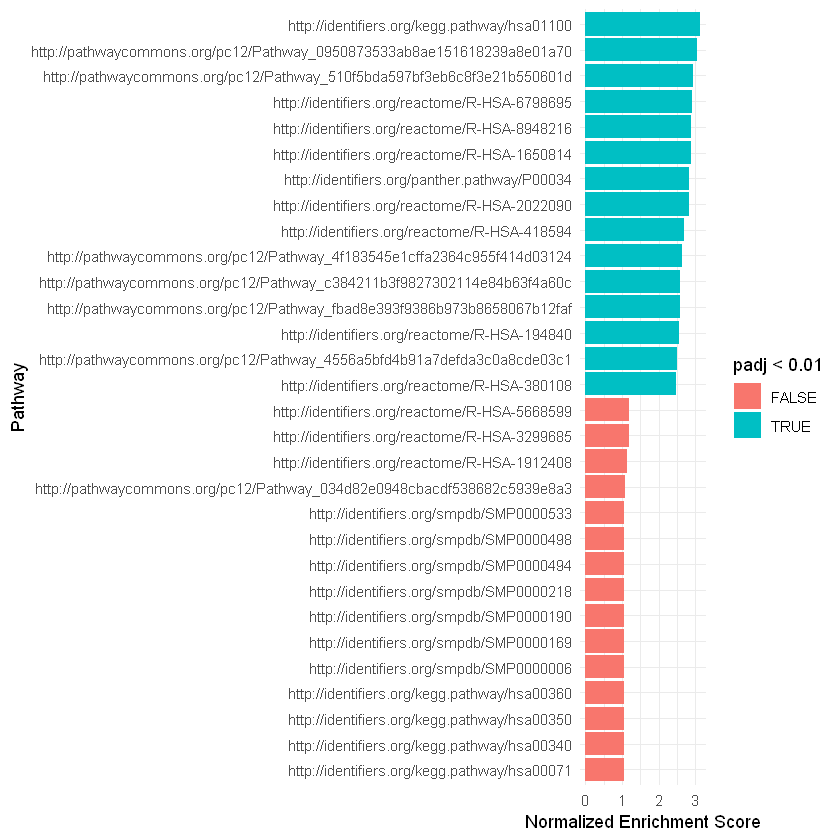

In [49]:
ggplot(rbind(head(fgseaResTidy, 15), tail(fgseaResTidy, 15)), aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.01)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score") + 
  theme_minimal()

In [42]:
head(cnv.db, 2)

Model    Gene  Alteration
1 CTG-0009 OR4F5 Gain      
2 CTG-0009 IFI6  Loss

In [43]:
print(attributes(lcpm.list))
print(attributes(lcpm.list$TGDB))
print(attributes(lcpm.list$HEME))

$names
[1] "TGDB" "HEME"

$names
[1] "lcpm"   "models" "Labels"

$names
[1] "lcpm"   "models" "Labels"



In [44]:
print(attributes(lrpkm.lst))
print(attributes(lrpkm.lst$TGDB))
print(attributes(lrpkm.lst$HEME))

$names
[1] "TGDB" "HEME"

$names
[1] "expression" "models"    

$names
[1] "expression" "models"    

